In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
len(dataset_train)

1258

In [5]:
training_set = dataset_train.iloc[:,1:2].values

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
#normalised between 0 and 1
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

Building and Training RNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units=1))

In [21]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
regressor.fit(X_train, y_train, epochs=100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0361
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0037
Epoch 13/100


In [23]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [25]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

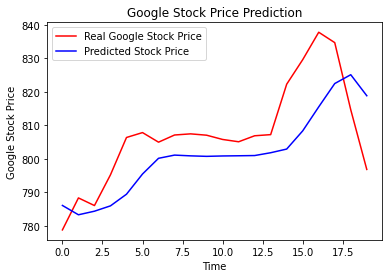

In [26]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()